I haven't used backtrader/ bt module. Instead I've coded everything from scratch

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Extracting historical (5 Year) price data and fundamentals (P/E ratio and Market Cap). (Though, fundamentals won't be used in any of my alpha signals )

In [2]:
tickers=['AAPL','MSFT','AMZN','GOOGL','META','TSLA','NVDA','JPM','JNJ','WMT']

In [3]:
def price_data(tickers):
    for t in tickers:
        df=yf.download(t,start='2020-01-01',end='2025-01-01')
        ticker = yf.Ticker(t)
        info = ticker.info
        print("P/E Ratio:", info.get("trailingPE"))
        print("Market Cap:", info.get("marketCap"))
        print(df.head())
price_data(tickers)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


P/E Ratio: 30.97192
Market Cap: 2965204369408
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716072  72.776598  71.466812  71.721019  135480400
2020-01-03  72.009125  72.771752  71.783969  71.941336  146322800
2020-01-06  72.582901  72.621639  70.876068  71.127858  118387200
2020-01-07  72.241554  72.849231  72.021238  72.592601  108872000
2020-01-08  73.403641  73.706271  71.943751  71.943751  132079200


[*********************100%***********************]  1 of 1 completed


P/E Ratio: 33.90495
Market Cap: 3260878422016
Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2020-01-02  153.323257  153.428261  151.137295  151.566850  22622100
2020-01-03  151.414108  152.683690  150.879551  151.127749  21116200
2020-01-06  151.805466  151.872293  149.399942  149.944055  20813700
2020-01-07  150.421402  152.416453  150.173219  152.082362  21634100
2020-01-08  152.817383  153.495135  150.774600  151.710076  27746500


[*********************100%***********************]  1 of 1 completed


P/E Ratio: 31.442997
Market Cap: 2049602093056
Price           Close       High        Low       Open    Volume
Ticker           AMZN       AMZN       AMZN       AMZN      AMZN
Date                                                            
2020-01-02  94.900497  94.900497  93.207497  93.750000  80580000
2020-01-03  93.748497  94.309998  93.224998  93.224998  75288000
2020-01-06  95.143997  95.184502  93.000000  93.000000  81236000
2020-01-07  95.343002  95.694504  94.601997  95.224998  80898000
2020-01-08  94.598503  95.550003  94.321999  94.902000  70160000


[*********************100%***********************]  1 of 1 completed


P/E Ratio: 17.028984
Market Cap: 1862480822272
Price           Close       High        Low       Open    Volume
Ticker          GOOGL      GOOGL      GOOGL      GOOGL     GOOGL
Date                                                            
2020-01-02  68.108368  68.108368  67.004150  67.099694  27278000
2020-01-03  67.752083  68.360677  67.045462  67.079304  23408000
2020-01-06  69.557945  69.583321  67.228582  67.259926  46768000
2020-01-07  69.423592  69.841098  69.246938  69.689821  34330000
2020-01-08  69.917725  70.256604  69.300178  69.409154  35314000


[*********************100%***********************]  1 of 1 completed


P/E Ratio: 23.14414
Market Cap: 1489715462144
Price            Close        High         Low        Open    Volume
Ticker            META        META        META        META      META
Date                                                                
2020-01-02  208.795944  208.805892  205.302415  205.780159  12077100
2020-01-03  207.691147  209.413027  205.979214  206.238004  11188400
2020-01-06  211.602707  211.781855  205.551226  205.730374  17058900
2020-01-07  212.060547  213.573421  210.756694  211.821682  14912400
2020-01-08  214.210419  215.225638  211.612661  212.000831  13475000


[*********************100%***********************]  1 of 1 completed


P/E Ratio: 169.46591
Market Cap: 960683573248
Price           Close       High        Low       Open     Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                             
2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500


[*********************100%***********************]  1 of 1 completed


P/E Ratio: 39.676872
Market Cap: 2846259937280
Price          Close      High       Low      Open     Volume
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA
Date                                                         
2020-01-02  5.972160  5.972160  5.892751  5.943284  237536000
2020-01-03  5.876572  5.920384  5.827532  5.852425  205384000
2020-01-06  5.901214  5.906442  5.757082  5.783220  262636000
2020-01-07  5.972660  6.018463  5.884537  5.929594  314856000
2020-01-08  5.983860  6.025184  5.928348  5.968427  277108000


[*********************100%***********************]  1 of 1 completed


P/E Ratio: 12.424152
Market Cap: 703332089856
Price            Close        High         Low        Open    Volume
Ticker             JPM         JPM         JPM         JPM       JPM
Date                                                                
2020-01-02  120.733551  120.742117  119.167582  119.621112  10803700
2020-01-03  119.140320  119.906800  118.055195  118.416903  10386800
2020-01-06  119.045593  119.080049  117.555697  117.607368  10259000
2020-01-07  117.021744  118.726944  116.970073  118.227438  10531300
2020-01-08  117.934616  118.485792  116.780593  116.866706   9695300


[*********************100%***********************]  1 of 1 completed


P/E Ratio: 17.154617
Market Cap: 371064111104
Price            Close        High         Low        Open   Volume
Ticker             JNJ         JNJ         JNJ         JNJ      JNJ
Date                                                               
2020-01-02  126.055176  126.098357  125.286600  125.968814  5777000
2020-01-03  124.595726  125.537013  123.490359  123.922143  5752400
2020-01-06  124.440247  124.526596  123.360786  124.353884  7731300
2020-01-07  125.200233  125.606112  122.091393  124.362570  7382900
2020-01-08  125.182953  126.063784  124.094848  125.105222  6605800


[*********************100%***********************]  1 of 1 completed


P/E Ratio: 40.13278
Market Cap: 773846073344
Price           Close       High        Low       Open    Volume
Ticker            WMT        WMT        WMT        WMT       WMT
Date                                                            
2020-01-02  36.593372  36.885651  36.519532  36.568758  20294700
2020-01-03  36.270325  36.547224  36.178027  36.387237  16197600
2020-01-06  36.196487  36.331860  35.925743  36.119569  19336500
2020-01-07  35.861137  36.156493  35.750380  36.076501  20540700
2020-01-08  35.738075  35.913442  35.590397  35.781147  17627400


Creating new dataframe of open price, adjusted close price and volume of all stocks

In [3]:
open=pd.DataFrame()
def open_price(tickers):
    for t in tickers:
        open[t]=yf.download(t,start='2020-01-01',end='2025-01-01',auto_adjust=False,progress=False)['Open']
    print(open.head())
open_price(tickers)

                 AAPL        MSFT       AMZN      GOOGL        META  \
Date                                                                  
2020-01-02  74.059998  158.779999  93.750000  67.420502  206.750000   
2020-01-03  74.287498  158.320007  93.224998  67.400002  207.210007   
2020-01-06  73.447502  157.080002  93.000000  67.581497  206.699997   
2020-01-07  74.959999  159.320007  95.224998  70.023003  212.820007   
2020-01-08  74.290001  158.929993  94.902000  69.740997  213.000000   

                 TSLA     NVDA         JPM         JNJ        WMT  
Date                                                               
2020-01-02  28.299999  5.96875  139.789993  145.869995  39.619999  
2020-01-03  29.366667  5.87750  137.500000  143.500000  39.423332  
2020-01-06  29.364668  5.80800  136.559998  144.000000  39.133331  
2020-01-07  30.760000  5.95500  137.279999  144.009995  39.086666  
2020-01-08  31.580000  5.99400  135.699997  144.869995  38.766666  


In [4]:
adj_close=pd.DataFrame()
def adj_cls(tickers):
    for t in tickers:
        adj_close[t]=yf.download(t,start='2020-01-01',end='2025-01-01',auto_adjust=False,progress=False)['Adj Close']
    print(adj_close.head())
adj_cls(tickers)

                 AAPL        MSFT       AMZN      GOOGL        META  \
Date                                                                  
2020-01-02  72.716087  153.323288  94.900497  68.108368  208.795929   
2020-01-03  72.009125  151.414108  93.748497  67.752075  207.691147   
2020-01-06  72.582924  151.805466  95.143997  69.557945  211.602707   
2020-01-07  72.241539  150.421402  95.343002  69.423584  212.060577   
2020-01-08  73.403648  152.817337  94.598503  69.917725  214.210434   

                 TSLA      NVDA         JPM         JNJ        WMT  
Date                                                                
2020-01-02  28.684000  5.972160  120.733566  126.055191  36.593369  
2020-01-03  29.534000  5.876571  119.140297  124.595734  36.270329  
2020-01-06  30.102667  5.901215  119.045570  124.440300  36.196480  
2020-01-07  31.270666  5.972660  117.021721  125.200218  35.861137  
2020-01-08  32.809334  5.983861  117.934639  125.182976  35.738075  


In [5]:
vol=pd.DataFrame()
def volume(tickers):
    for t in tickers:
        vol[t]=yf.download(t,start='2020-01-01',end='2025-01-01',auto_adjust=False,progress=False)['Volume']
    print(vol.head())
volume(tickers)

                 AAPL      MSFT      AMZN     GOOGL      META       TSLA  \
Date                                                                       
2020-01-02  135480400  22622100  80580000  27278000  12077100  142981500   
2020-01-03  146322800  21116200  75288000  23408000  11188400  266677500   
2020-01-06  118387200  20813700  81236000  46768000  17058900  151995000   
2020-01-07  108872000  21634100  80898000  34330000  14912400  268231500   
2020-01-08  132079200  27746500  70160000  35314000  13475000  467164500   

                 NVDA       JPM      JNJ       WMT  
Date                                                
2020-01-02  237536000  10803700  5777000  20294700  
2020-01-03  205384000  10386800  5752400  16197600  
2020-01-06  262636000  10259000  7731300  19336500  
2020-01-07  314856000  10531300  7382900  20540700  
2020-01-08  277108000   9695300  6605800  17627400  


Extracting S&P 500 data of past 5 years (Will acts as benchmark for alpha calculation)

In [6]:
spy=(yf.download('SPY',start='2020-01-01',end='2025-01-01',auto_adjust=False))
spy.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2020-01-02,300.291595,324.869995,324.890015,322.529999,323.540009,59151200
2020-01-03,298.017700,322.410004,323.640015,321.100006,321.160004,77709700
2020-01-06,299.154602,323.640015,323.730011,320.359985,320.489990,55653900
2020-01-07,298.313416,322.730011,323.540009,322.239990,323.019989,40496400
2020-01-08,299.903381,324.450012,325.779999,322.670013,322.940002,68296000


Normalilizing the prices to 100 (for visualization) 

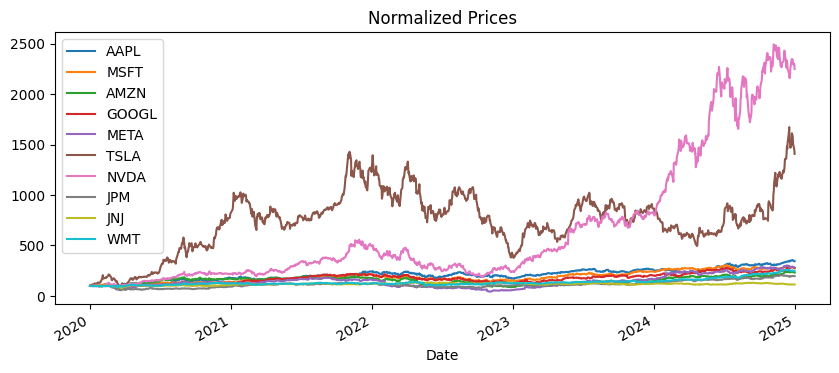

In [9]:
(adj_close/adj_close.iloc[0]*100).plot(figsize=(10,4))
plt.title('Normalized Prices')
plt.show()

Alpha Signal 1 (20 Day Momentum Of Volume)

In [10]:
#Long on top 3 stocks with maximum sum of vol/adj close for past 20 days (short bottom 3)
dict1={}
def signal_1(tickers):
    for t in tickers:
        a=list(adj_close[t])
        b=list(open[t])
        c=list(vol[t])
        for i in range(21):
            c[i]=vol[t].iloc[i]//adj_close[t].iloc[i]
        sum1=sum(c[:21])
        dict1[t]=sum1
    final_1=list(dict(sorted(dict1.items(), key=lambda item: item[1])).keys())
    return final_1

Alpha Signal 2 (20 day Momentum)

In [11]:
#Long on top 3 stocks with maximum returns for past 20 days (short bottom 3)
dict2={}
def signal_2(tickers):
    for t in tickers:
        a=list(adj_close[t])
        ret=a[20]/a[0] - 1
        dict2[t]=ret
    final_2=list(dict(sorted(dict2.items(), key=lambda item: item[1])).keys())
    return final_2

Alpha Signal 3 (20 Day Volatility)

In [12]:
#Long on top 3 stocks with least volatility for past 20 days (short bottom 3)
dict3={}
def signal_3(tickers):
    for t in tickers:
        a=np.array(adj_close[t])
        vola=a[:21].var()
        dict3[t]=vola
    final_3=list(dict(sorted(dict3.items(), key=lambda item: item[1],reverse=True)).keys())
    return final_3

Combined Alpha Signal

In [13]:
#Long on top 3 stocks with maximum value of combined signal (short bottom 3)
dict4={}
def signal_4(tickers):
    for t in tickers:
        a=np.array(adj_close[t])
        vola=a[:21].var()   
        ret=a[20]/a[0] - 1
        c=list(vol[t])
        for i in range(21):
            c[i]=vol[t].iloc[i]//adj_close[t].iloc[i]
        sum1=sum(c[:21])
        dict4[t]=sum1*ret/vola
    final_4=list(dict(sorted(dict3.items(), key=lambda item: item[1])).keys())
    return final_4

Initial Fund= $ 30 Million

It'll be long-short dollar neutral strategy (equal amount bought and shorted). For simplicity, I'll be allocating equal amount to each stock bought and shorted (5 million). Profit won't be reinvested. After every rebalance, fund resets to $ 30 million.

Risk free rate= 4% (annualized). It's the yield of 5 year US treasury bond 

In [14]:
start=spy['Adj Close'].iloc[0]
end=spy['Adj Close'].iloc[-1]
ret=np.array(((end/start) - 1) * 100)
print(f"5 year return of S&P 500: {round(ret[0], 2)} %")

5 year return of S&P 500: 94.58 %


Performance Reason: Alpha of each signal below is too high as there was a bull-run in the US market for tech-stocks from 2020-2024 (even NASDAQ outperformed S&P by a small margin). Whenever there was decline in prices, the strategy shorts the stocks based on the signals, ultimately resulting in further profit. 

Strategy

In [24]:
def strategy(Signal, start, end):
    #Converting start and end date to datetime object
    start_date = datetime.strptime(start, "%Y-%m-%d")
    end_date = datetime.strptime(end, "%Y-%m-%d")
    days = int((end_date - start_date).days)    #Difference between start and end date in terms of number of days
    long_pnl = []
    short_pnl=[]
    final_pnl=[]
    portfolio = []
    daily_ret = []
    dd1=[]
    dd2=[]
    dd3=[]
    i = 0
    #While loop helps in rebalancing after every 30 days
    while i < days:
        if i + 30 >= len(adj_close['AAPL']): 
            break
        final_1 = Signal(tickers)
        #Go long on top 3 stocks
        long = final_1[-1:-4:-1]
        #Short bottom 3 stocks
        short = final_1[:3]
        #These 2 lists hold number of shares of long and shorted stocks
        long_shares = []
        short_shares = []
        # $30 million is total fund value. Means each stock gets $5 million (5*6=30)
        for t in long:
            long_shares.append(int(5000000 // adj_close[t].iloc[i]))    
        for t in short:
            short_shares.append(int(5000000 // adj_close[t].iloc[i]))
        #long_pnl, short_pnl store PnL from bought and short shares respectively
        for t, shares in zip(long, long_shares):
            values = adj_close[t].iloc[i:i+30]  #adj close values of the month in iteration 
            for j in range(1, len(values)):
                a = (values.iloc[j] - values.iloc[j-1]) * shares
                long_pnl.append(a if a > -30000 else -30000)    #Stoploss= -$30000
        for t, shares in zip(short, short_shares):
            values = adj_close[t].iloc[i:i+30]
            for j in range(1, len(values)):
                b = (values.iloc[j-1] - values.iloc[j]) * shares
                short_pnl.append(b if b > -30000 else -30000)   #Stoploss= -$30000
        i += 30 #Goes to next month
    #As 3 stocks bought and short, so I'm doing list manupulation to get total long PnL (l2) and short PnL (s2) for each month
    l2,s2=[],[]
    for j in range(0,len(long_pnl),3):
        l2.append(long_pnl[j:j+3])
    for j in range(len(l2)):
        l2[j]=sum(l2[j])
    for j in range(0,len(short_pnl),3):
        s2.append(short_pnl[j:j+3])
    for j in range(len(s2)):
        s2[j]=sum(s2[j])
    final_pnl = [l + s for l, s in zip(l2, s2)]    #Gives PnL for each day (long+short PnL)
    #Gives portfolio value ($30 million +- PnL)
    for j in range(len(final_pnl)):
        portfolio.append(30000000 + sum(final_pnl[0:j+1]))
    #Maximum drawdown calculation
    for j in range(1,len(portfolio)):
        if portfolio[j]<portfolio[j-1]:
            dd1.append([portfolio[j-1],portfolio[j]])
    for j in range(1,len(dd1)):
        if dd1[j][0]==dd1[j-1][1]:
            dd2.append([dd1[j-1][0],dd1[j][1]])
    for j in range(len(dd2)):
        dd3.append(dd2[j][0]-dd2[j][1])
    index=dd3.index(max(dd3))
    peak=dd2[index][0]
    #Daily returns of portfolio (for sharpe ratio calculation)
    for j in range(1, len(portfolio)):
        daily_ret.append(portfolio[j] / portfolio[j-1] - 1)
    daily_ret = np.array(daily_ret)
    pd.Series(final_pnl).cumsum().plot(figsize=(12, 4), xlabel='Time (in days)', ylabel='PnL (*10^8)')  #plot cumulative PnL
    plt.title('Cumulative PnL')
    plt.show()
    print(f'PnL: {round(sum(final_pnl), 2)} ({round(sum(final_pnl) * 100 / 30000000, 2)}%)')
    print(f'Alpha: {round(sum(final_pnl) * 100 / 30000000, 2)}% - {round(ret[0], 2)}% = {round(round(sum(final_pnl) * 100 / 30000000, 2) - round(ret[0], 2), 2)}%')
    print(f'Maximum Drawdown: {round((max(dd3) / peak) * 100, 2)}%')
    print(f'Sharpe Ratio: {round(((daily_ret.mean() - 0.000158730159) / daily_ret.std()) * np.sqrt(252), 2)}')  #0.000158730159 is 4%/252 (daily adjusted risk free rate)

Signal 1 Strategy

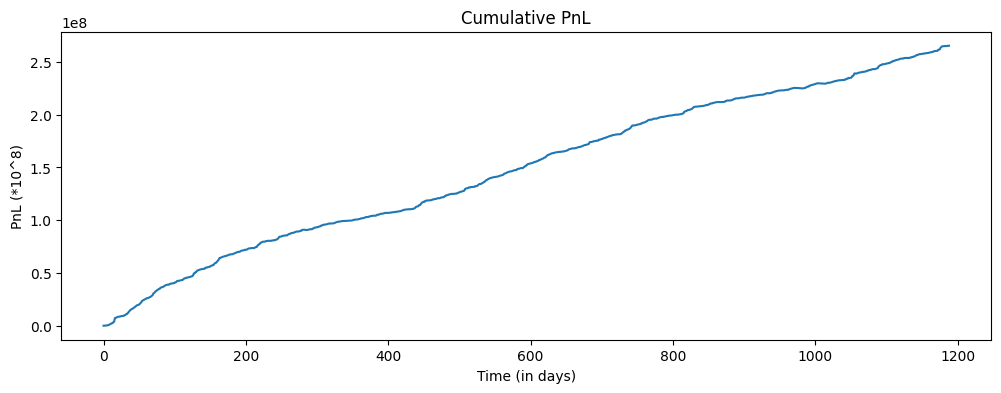

PnL: 265206491.48 (884.02%)
Alpha: 884.02% - 94.58% = 789.44%
Maximum Drawdown: 0.23%
Sharpe Ratio: 7.01


In [25]:
strategy(signal_1,'2020-01-01','2025-01-01')

Signal 2 Strategy

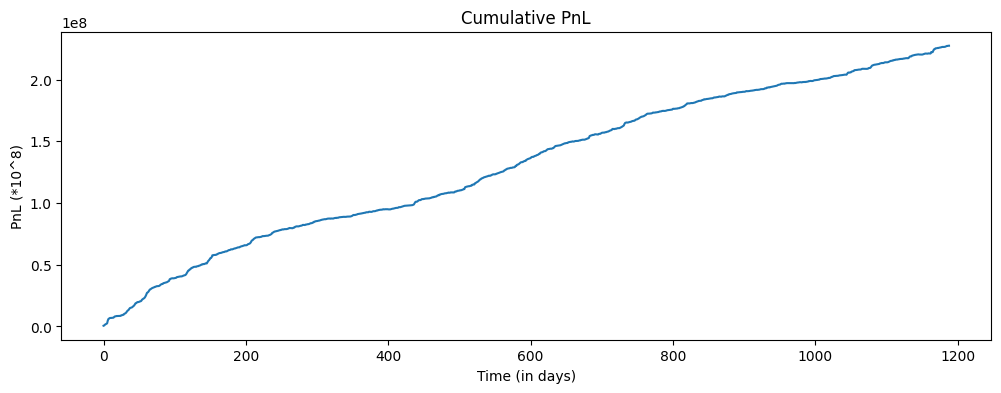

PnL: 227463604.05 (758.21%)
Alpha: 758.21% - 94.58% = 663.63%
Maximum Drawdown: 0.09%
Sharpe Ratio: 6.82


In [18]:
strategy(signal_2,'2020-01-01','2025-01-01')

Signal 3 Strategy

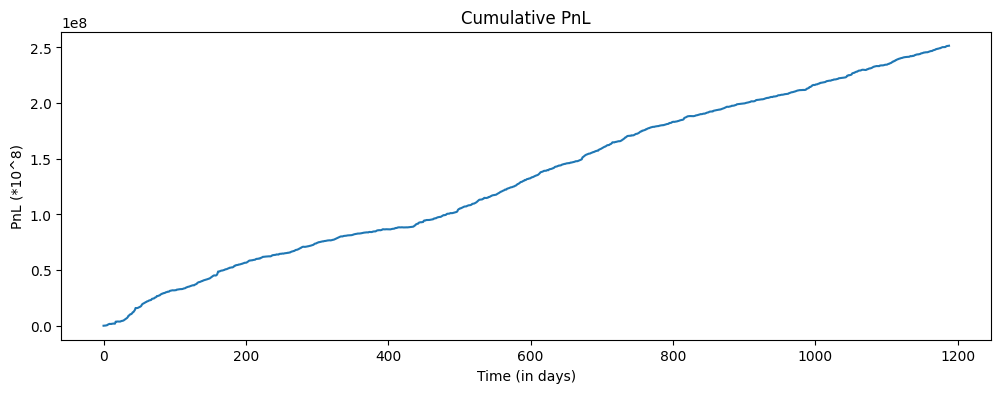

PnL: 251561866.36 (838.54%)
Alpha: 838.54% - 94.58% = 743.96%
Maximum Drawdown: 0.63%
Sharpe Ratio: 7.77


In [19]:
strategy(signal_3,'2020-01-01','2025-01-01')

Combined Signal Strategy

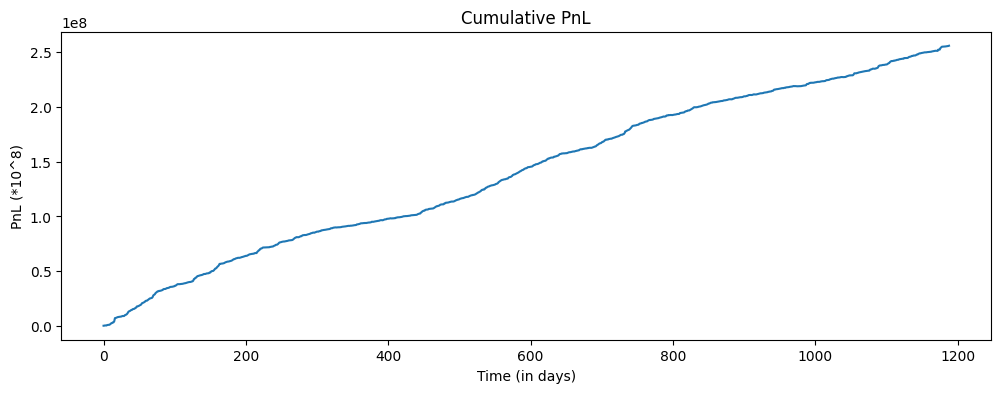

PnL: 256057344.27 (853.52%)
Alpha: 853.52% - 94.58% = 758.94%
Maximum Drawdown: 0.12%
Sharpe Ratio: 7.12


In [20]:
strategy(signal_4,'2020-01-01','2025-01-01')

Signal's Contribution: Signal 3 gave the best sharpe ratio (7.77) while Signal 2 the worst (6.82). The combined signal's sharpe ratio (7.12) is nearest to Signal 1's sharpe ratio (7.01)